## Model Selection using RFE (Bike sharing assignment)

### Importing, Understanding Data, removing columns

In [2]:
# import data, libraries, Supress Warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Importing day.csv
bike_sharing = pd.read_csv(r'C:\Users\kbhosale\Desktop\Kunal\career\AIAndML\Assignment-Bike sharing\day.csv')
bike_sharing.shape


(730, 16)

In [236]:
#describe the data frame to know statistics
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [192]:
#check not null values, all columns seems to have non null values
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [193]:
# Looking at the first five rows
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<AxesSubplot:xlabel='temp'>

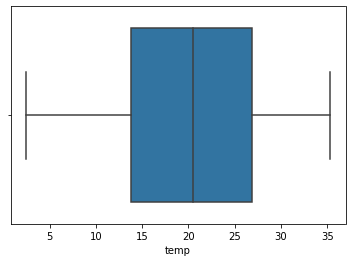

In [195]:
#kind of a univariate analysis
sns.boxplot(bike_sharing["temp"])

<AxesSubplot:xlabel='hum'>

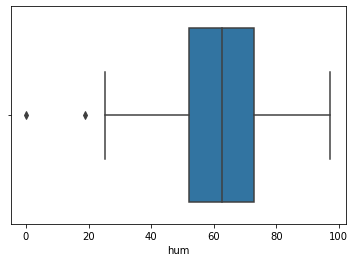

In [196]:
#kind of a univariate analysis
sns.boxplot(bike_sharing["hum"])
##Number of outliers are very less, dont feel treating them would make any difference to model that we are creating

<AxesSubplot:xlabel='windspeed'>

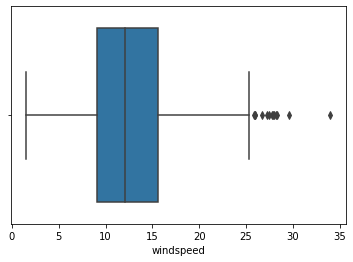

In [197]:
#kind of a univariate analysis
sns.boxplot(bike_sharing["windspeed"])
##Number of outliers are very less, dont feel treating them would make any difference to model that we are creating

In [3]:
#drop columns instant, dteday, yr, casual, registered as they dont impact the analysis that we are planning to achive
bike_sharing = bike_sharing.drop(["instant","dteday","yr","casual","registered"], axis=1)

bike_sharing

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


### Data Visualisation

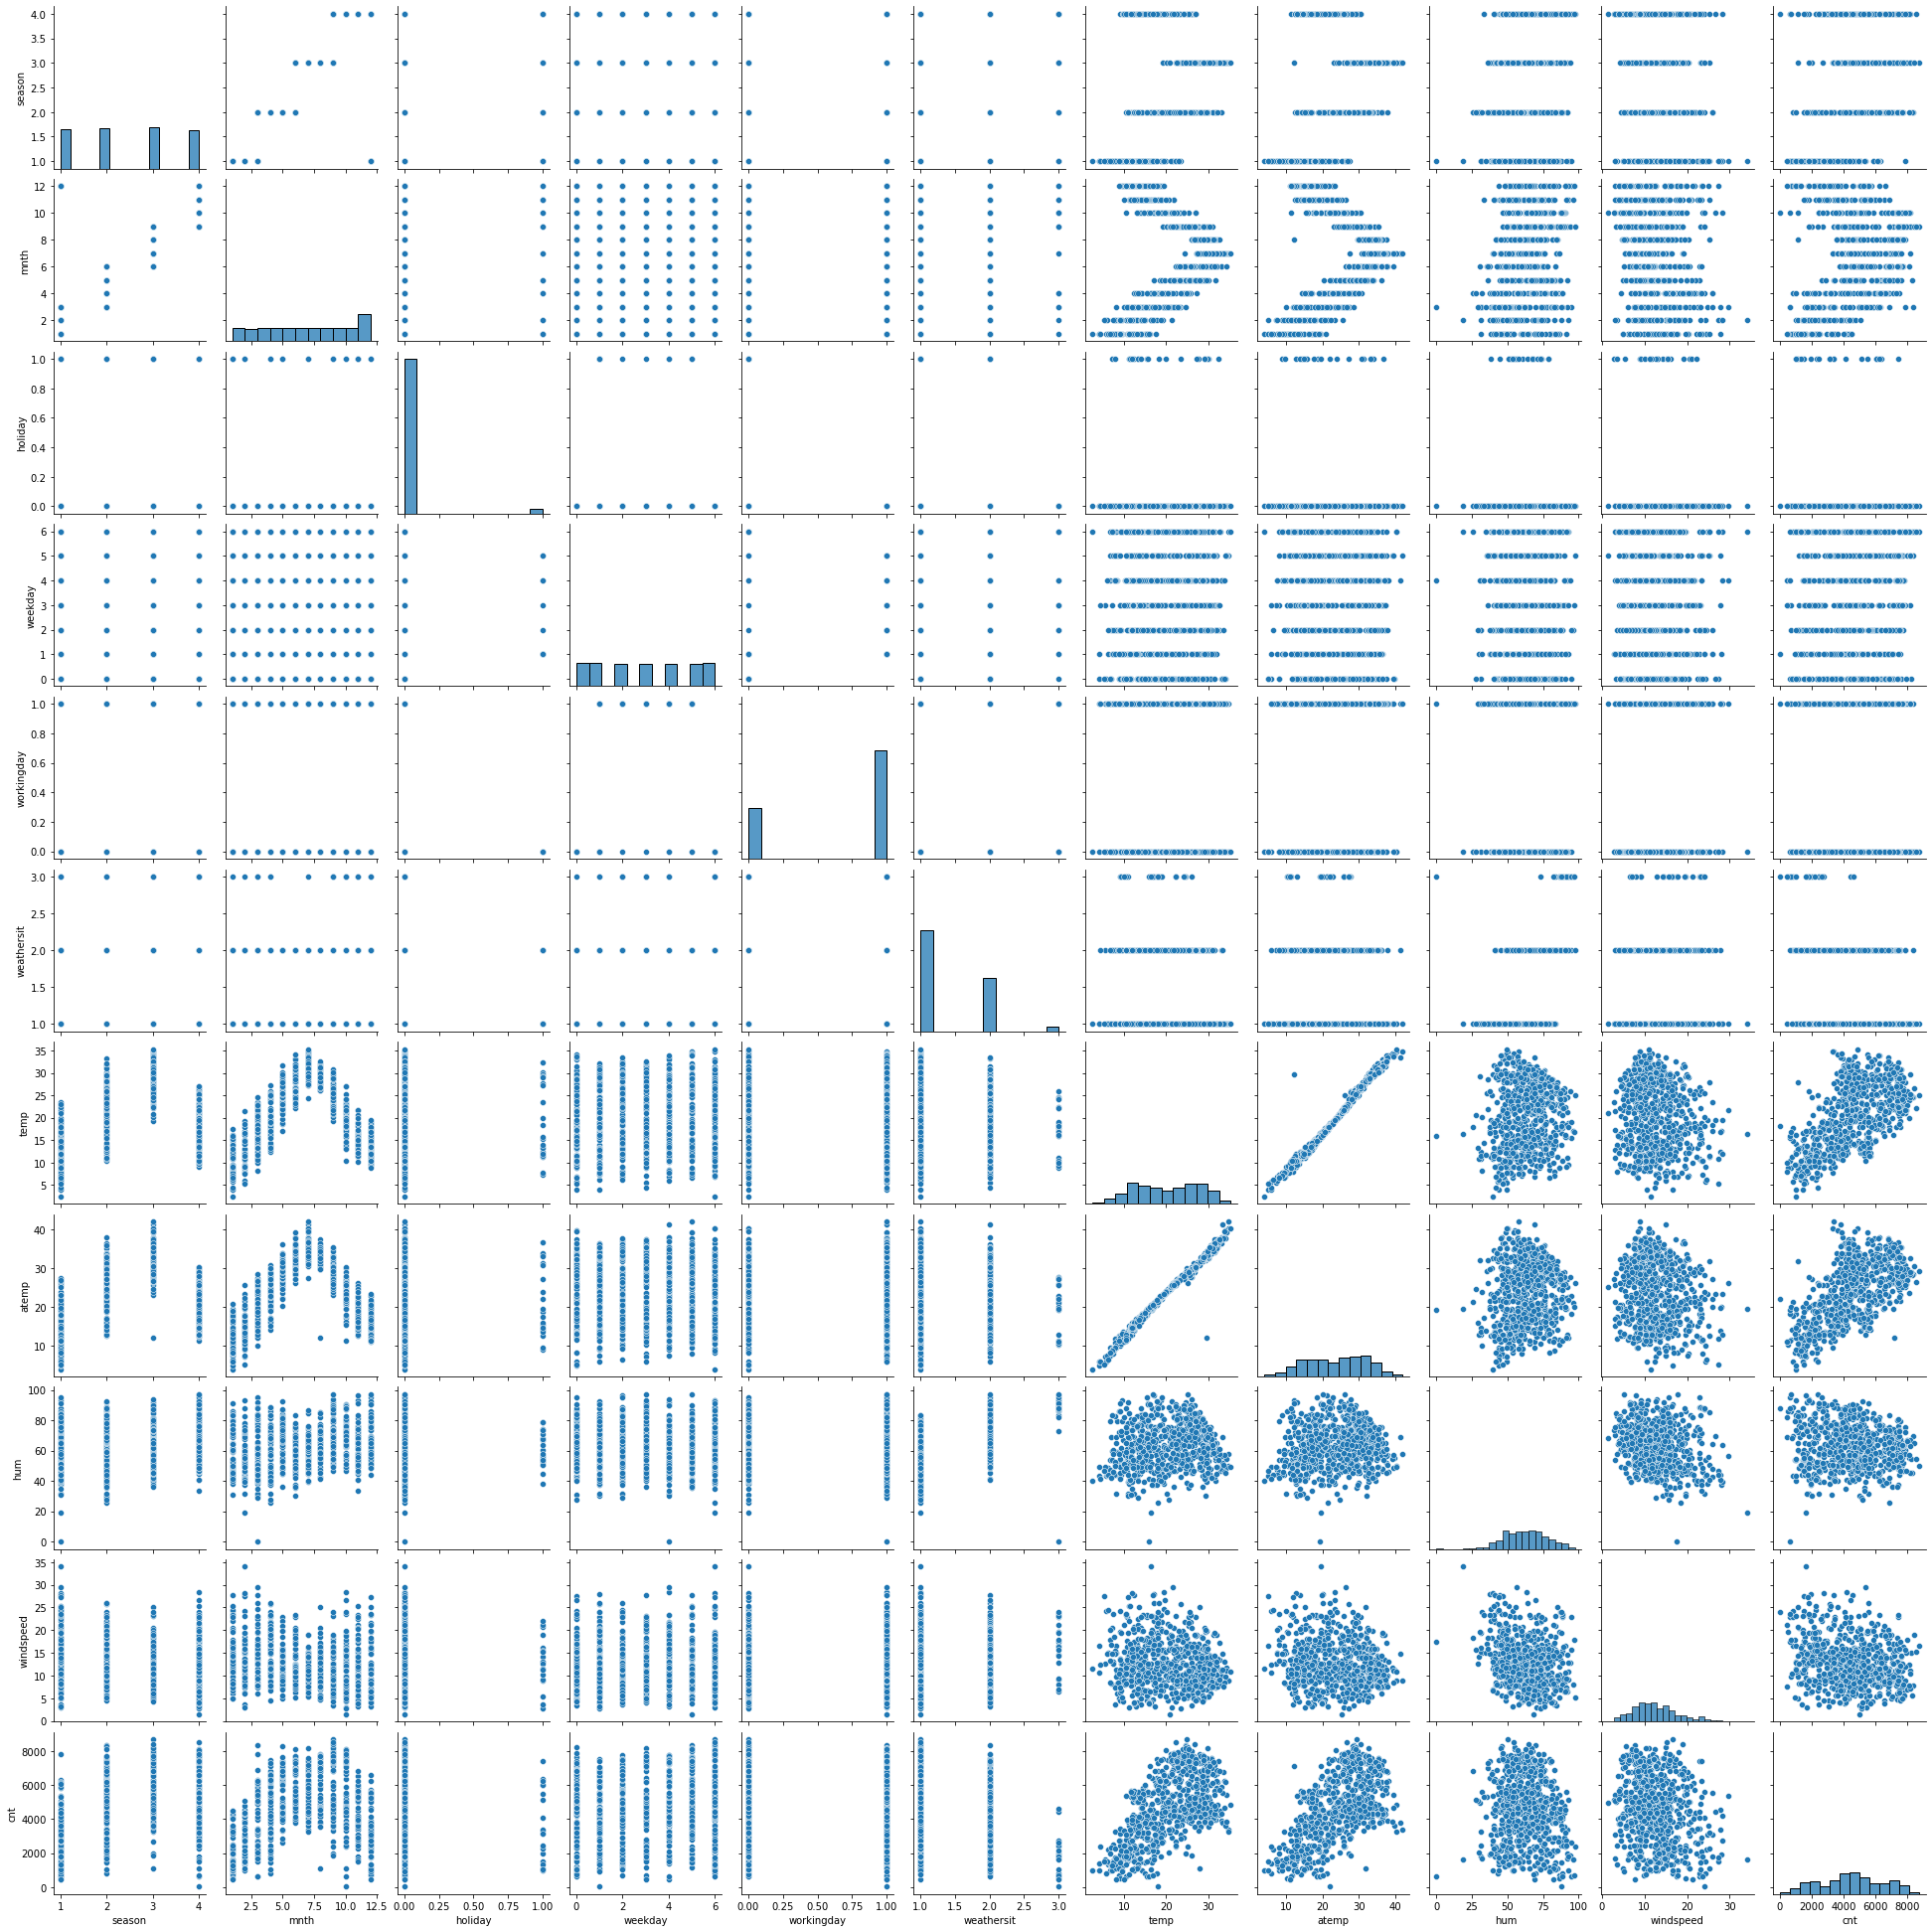

In [199]:
#High level visualisation - cnt seems to have linear relation with temperature, atemp, and can be seen that it gets impacted also because of weathersit and holiday 
sns.pairplot(bike_sharing)
plt.show()

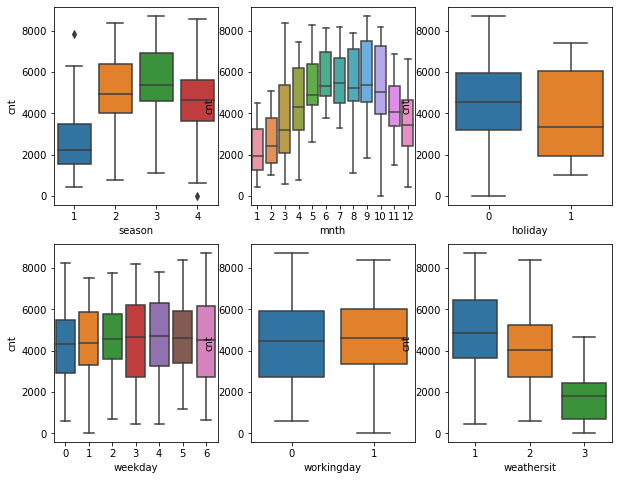

In [238]:
#data visualisation for categorial variables - clearly shows that 
#season 2,3 (summer, fall), mnth - 6.7.8 (jul,Aug, Sep), holiday, weathersit 1 (Clear weahther) have positive corelation with cnt
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="season", y="cnt",data=bike_sharing)
plt.subplot(2,3,2)
sns.boxplot(x="mnth", y="cnt",data=bike_sharing)
plt.subplot(2,3,3)
sns.boxplot(x="holiday", y="cnt",data=bike_sharing)
plt.subplot(2,3,4)
sns.boxplot(x="weekday", y="cnt",data=bike_sharing)
plt.subplot(2,3,5)
sns.boxplot(x="workingday", y="cnt",data=bike_sharing)
plt.subplot(2,3,6)
sns.boxplot(x="weathersit", y="cnt",data=bike_sharing)
plt.show()

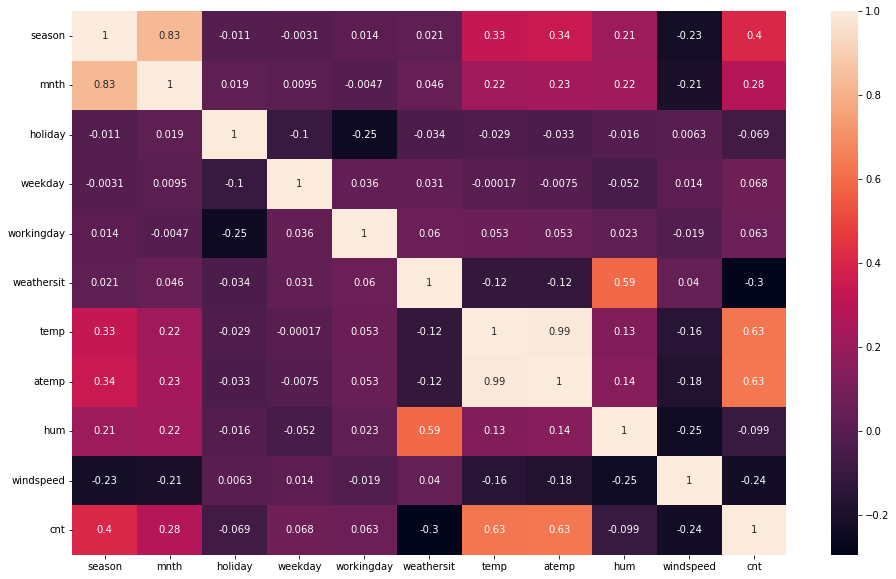

In [209]:
plt.figure(figsize=(16,10))
sns.heatmap(bike_sharing.corr(), annot=True)
plt.show()

### Data Preparation

In [202]:
# variables holiday, workingday are already binary encoded


### Dummy Variables

The variable `month` has twelve levels. We need to convert these levels into binary format. For this, we will use something called `dummy variables`.

In [4]:
# Get the dummy variables for the feature 'month' and store it in a new variable - 'monthbinary'
monthbinary = pd.get_dummies(bike_sharing['mnth'], drop_first=True )
# rename columns starting with February as we are dropping first column
monthbinary.columns = ["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# Add the results to the original bike_sharing dataframe
bike_sharing = pd.concat([bike_sharing, monthbinary], axis = 1)
#drop original column mnth as we have replaced that with other month variables
bike_sharing.drop(['mnth'], axis = 1, inplace = True)
# Check what the dataset 'bike_sharing' looks like
bike_sharing.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekdaybinary'
weekdaybinary = pd.get_dummies(bike_sharing['weekday'], drop_first=True )
# rename columns starting with Monday as we are dropping first column Sunday
weekdaybinary.columns = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
# Add the results to the original bike_sharing dataframe
bike_sharing = pd.concat([bike_sharing, weekdaybinary], axis = 1)
#drop original column weekday as we have replaced that with other weekday variables
bike_sharing.drop(['weekday'], axis = 1, inplace = True)
# Check what the dataset 'bike_sharing' looks like
bike_sharing.head()

,season,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Feb,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat
0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# Get the dummy variables for the 'weathersit' and store it in a new variable - 'weathersitbinary'
weathersitbinary = pd.get_dummies(bike_sharing['weathersit'], drop_first=True )
# rename columns starting with Monday as we are dropping first column Sunday
weathersitbinary.columns = ["Mist", "LightRain"]
# Add the results to the original bike_sharing dataframe
bike_sharing = pd.concat([bike_sharing, weathersitbinary], axis = 1)
#drop original column weekday as we have replaced that with other weekday variables
bike_sharing.drop(['weathersit'], axis = 1, inplace = True)
# Check what the dataset 'bike_sharing' looks like
bike_sharing.head()

,season,holiday,workingday,temp,atemp,hum,windspeed,cnt,Feb,Mar,...,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Mist,LightRain
0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,season,holiday,workingday,temp,atemp,hum,windspeed,cnt,Feb,Mar,...,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Mist,LightRain
653,4,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,3,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,2,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,0,0,1,1,0


### Dividing into X and Y sets for the model building

In [10]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [11]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 14, 
#I did try different numbers here before finalising 14
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 14)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Feb', False, 7),
 ('Mar', False, 2),
 ('Apr', True, 1),
 ('May', False, 3),
 ('Jun', True, 1),
 ('Jul', True, 1),
 ('Aug', True, 1),
 ('Sep', False, 9),
 ('Oct', False, 12),
 ('Nov', False, 4),
 ('Dec', False, 5),
 ('Mon', False, 10),
 ('Tue', False, 6),
 ('Wed', False, 13),
 ('Thu', False, 8),
 ('Fri', False, 11),
 ('Sat', True, 1),
 ('Mist', True, 1),
 ('LightRain', True, 1)]

In [12]:
col = X_train.columns[rfe.support_]
col

Index(['season', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Apr', 'Jun', 'Jul', 'Aug', 'Sat', 'Mist', 'LightRain'],
      dtype='object')

In [13]:
X_train.columns[~rfe.support_]

Index(['Feb', 'Mar', 'May', 'Sep', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed',
       'Thu', 'Fri'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [14]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     50.89
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           2.10e-86
Time:                        16:03:24   Log-Likelihood:                 265.90
No. Observations:                 510   AIC:                            -501.8
Df Residuals:                     495   BIC:                            -438.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2743      0.047      5.831      0.0

`Bedrooms` is insignificant in presence of other variables; can be dropped

In [15]:
###lets drop variables with p values > .05 which in this case is are "atemp","Apr
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [16]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     54.91
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           2.83e-87
Time:                        16:03:36   Log-Likelihood:                 265.88
No. Observations:                 510   AIC:                            -503.8
Df Residuals:                     496   BIC:                            -444.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2738      0.047      5.833      0.0

In [17]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(['const'], axis=1)

vif = pd.DataFrame()
#X_train_new = X_train_rfe
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,18.89
3,temp,16.63
0,season,7.30
2,workingday,5.01
5,windspeed,3.84
11,Mist,2.12
10,Sat,1.90
8,Jul,1.77
9,Aug,1.72
7,Jun,1.58


In [18]:
#dropping hum columns as it has high VIF
X_train_new = X_train_new.drop(['hum'], axis=1)

In [19]:
# new model
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     55.54
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           8.43e-84
Time:                        16:03:53   Log-Likelihood:                 255.40
No. Observations:                 510   AIC:                            -484.8
Df Residuals:                     497   BIC:                            -429.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1173      0.033      3.591      0.0

In [20]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
#X_train_new = X_train_rfe
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,12.13
0,season,6.41
2,workingday,4.51
4,windspeed,3.66
9,Sat,1.79
7,Jul,1.63
8,Aug,1.60
10,Mist,1.56
6,Jun,1.50
5,Apr,1.18


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [21]:
y_train_cnt = lm.predict(X_train_lm)

In [22]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

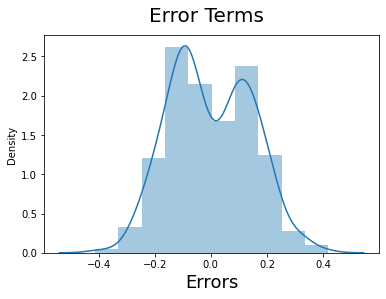

In [23]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [24]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [25]:
y_test = df_test.pop('cnt')
X_test = df_test

In [26]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [27]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

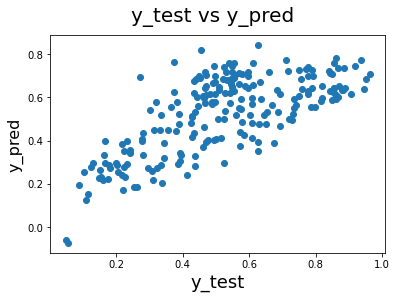

In [28]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.493163011084226